Importo le librerie e monto il drive:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carico un immagine:

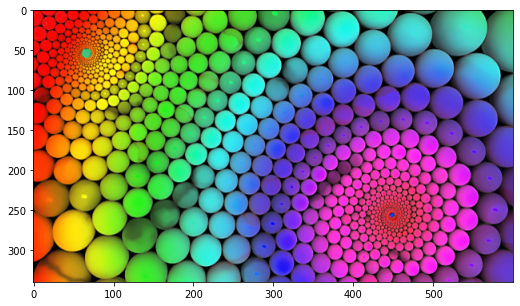

In [4]:
im = io.imread('/content/drive/MyDrive/digital signal/consegna_assignments/multicolor.webp')
plt.imshow(im)

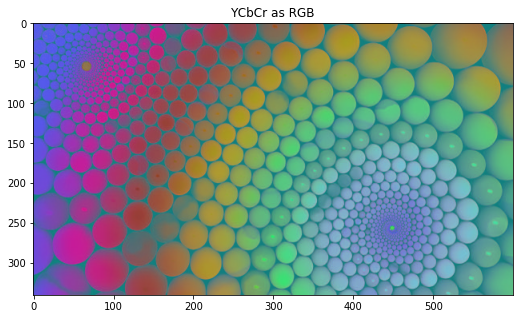

In [5]:
im_ycbcr = color.rgb2ycbcr(im)
plt.imshow((im_ycbcr).astype(np.uint8))
plt.title('YCbCr as RGB')
plt.show()

Text(0.5, 1.0, 'Cr')

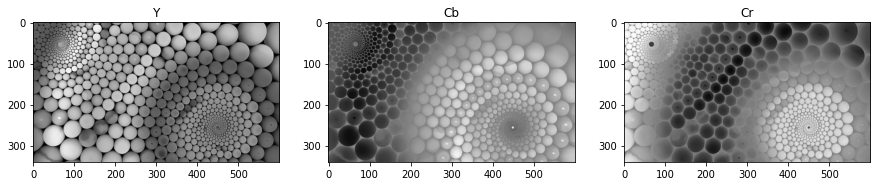

In [6]:
#Mostriamo ora i singoli canali dell'imagine riconvertita (con scala di grigio)
plt.subplot(1,3,1), plt.imshow(im_ycbcr[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2), plt.imshow(im_ycbcr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3), plt.imshow(im_ycbcr[:,:,2], cmap='gray'); plt.title('Cr')

Smoothing sui canali Cb e Cr:

Text(0.5, 1.0, 'Cr')

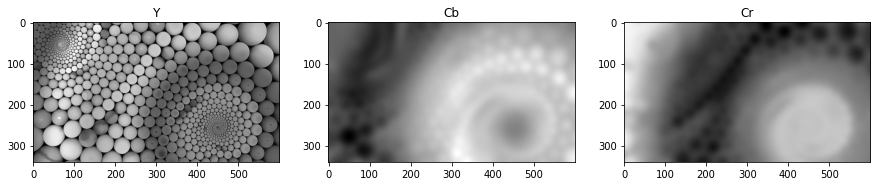

In [7]:
im_ycbcr_blur = im_ycbcr.copy()
im_ycbcr_blur[:,:,0] = im_ycbcr[:,:,0]
im_ycbcr_blur[:,:,1:3] = filters.gaussian(im_ycbcr[:,:,1:3], multichannel = True,
                                          sigma = [10,10])

plt.subplot(1,3,1), plt.imshow(im_ycbcr_blur[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2), plt.imshow(im_ycbcr_blur[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3), plt.imshow(im_ycbcr_blur[:,:,2], cmap='gray'); plt.title('Cr')

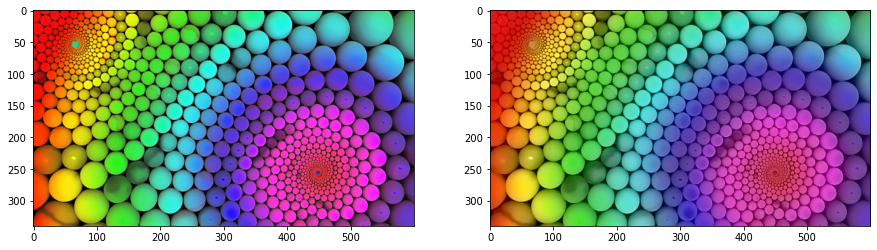

In [8]:
im_riconvertita = color.ycbcr2rgb(im_ycbcr_blur)

#Confrontiamo l'immagine di partenza con quella ottenuta dopo il blurring (e 
#riconvertita):
plt.subplot(1,2,1); plt.imshow(im)
plt.subplot(1,2,2); plt.imshow(im_riconvertita)

#Il blurring (o smoothing) è avvenuto solo sui colori, non
#sui "dettagli", perché non ho modificato Y ma solo Cb e Cr

Smoothing sul canale Y:

Text(0.5, 1.0, 'Cr')

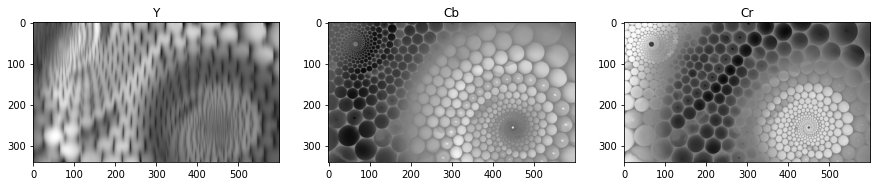

In [9]:
im_ycbcr_blur2 = im_ycbcr.copy()
im_ycbcr_blur2[:,:,0] = filters.gaussian(im_ycbcr[:,:,0], multichannel = True,
                                          sigma = 10) 

plt.subplot(1,3,1), plt.imshow(im_ycbcr_blur2[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2), plt.imshow(im_ycbcr_blur2[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3), plt.imshow(im_ycbcr_blur2[:,:,2], cmap='gray'); plt.title('Cr')

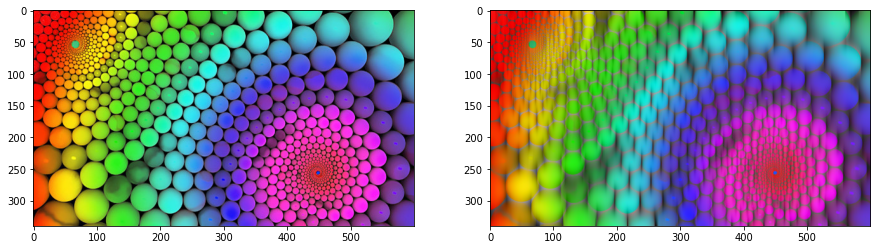

In [10]:
im_riconvertita2 = color.ycbcr2rgb(im_ycbcr_blur2)

#Confrontiamo l'immagine di partenza con quella ottenuta dopo il blurring (e 
#riconvertita):
plt.subplot(1,2,1); plt.imshow(im)
plt.subplot(1,2,2); plt.imshow(im_riconvertita2)

#Questa volta lo smoothing ha agito solo sui dettagli (dati da repentini cambi 
#di luminanza) e non sui colori

Creiamo ora due funzioni che facciano quanto appena fatto:

In [16]:
def compress_CbCr (image, sigma = [1,1]):
  im_YCbCr_blur = color.rgb2ycbcr(im).copy()
  im_YCbCr_blur[:,:,1:3] = filters.gaussian(im_ycbcr[:,:,1:3], multichannel = True,
                                          sigma = sigma)
  return color.ycbcr2rgb(im_YCbCr_blur)

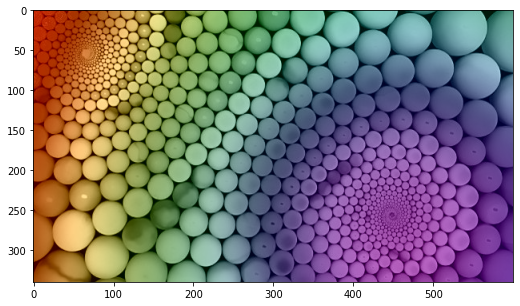

In [17]:
plt.imshow(compress_CbCr(im, sigma = [100,100]))

In [18]:
def compress_Y (image, sigma = 1):
  im_YCbCr_blur = color.rgb2ycbcr(im).copy()
  im_YCbCr_blur[:,:,0] = filters.gaussian(im_ycbcr[:,:,0], multichannel = True,
                                          sigma = sigma) 
  return color.ycbcr2rgb(im_YCbCr_blur)

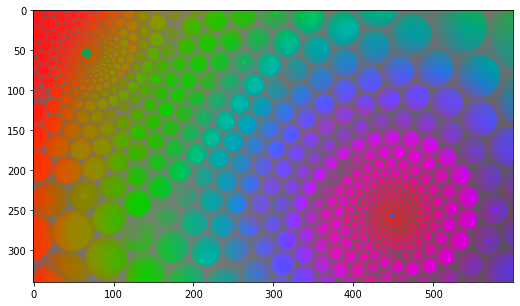

In [19]:
plt.imshow(compress_Y(im, sigma = [100,100]))